# Network simulator

This notebooks contains an example of a network model simulator


In [1]:

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import numpy as np

from rf_network_simulator.network_simulator import NetworkSimulator,RenderingOptions
from rf_network_simulator.rf_network import NodesDistributionParams
from rf_network_simulator import propogation_models as pmodels
from rf_network_simulator import simple_height_map_generator as hmgen
from rf_network_simulator.rf_network import NodeTypeDistribution


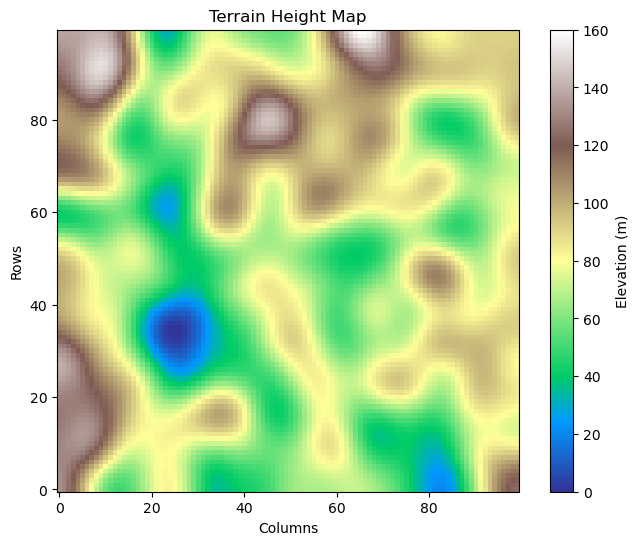

In [2]:
terrain_map = hmgen.generate_terrain_height_map(size=(100, 100), max_elevation=160, smoothness=5)
hmgen.visualize_terrain_height_map(terrain_map)


In [3]:
import os
import git
from os import path as osp
import datetime
from rf_network_simulator.configurator import create_simulator_from_yaml




Processing: 100%|██████████| 240/240 [02:06<00:00,  1.89it/s, accuracy=0.623, precision=0.75, recall=0.786] 


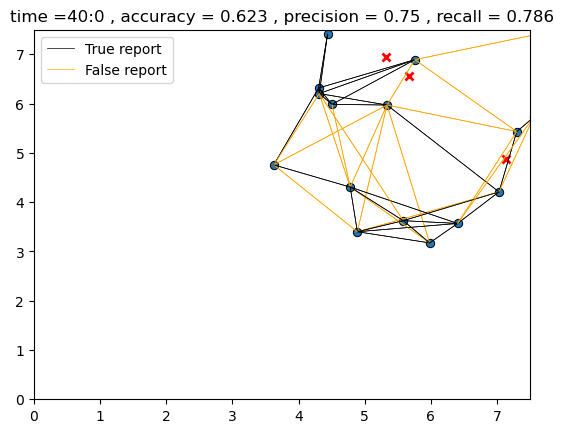

In [4]:


sim,experiment_folder=create_simulator_from_yaml()

res=sim.full_simulation()

res._to_yaml(osp.join(experiment_folder,"res_statistics.yaml"))





In [30]:
from rf_network_simulator.rf_network import create_distance_matrix


node = sim.nodes[0]

d = create_distance_matrix(sim.nodes)





In [18]:
from rf_network_simulator import propogation_models

model =propogation_models.PropogationModelEgli()

res=model(np.array([0,0])[None,:],np.array([2.0,0])[None,:],200,np.array([2.5]),np.array([2.5]))
print(res)

[130.14419939]
